# Comparing 2-Stage Algorithm Player to a Solo Player

In [1]:
import numpy as np
import math
import sys
import ipdb

sys.path.append("../")

sys.path.append("../utils/")
from utils_functions import *

from dd_game import *
from two_stage_player import *
from dfo_player import *
from solo_player import *

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 24
plt.rcParams['axes.linewidth'] = 4

In [2]:
np.random.seed(63)

d_1 = 2  # Dimension of each player's data/strategy
d_2 = 2

epsilon_0 = 0.1
epsilon_1 = 1  # Epsilon sensitivity parameters
epsilon_2 = 1

Sigma_x_p1 = np.eye(d_1)  # Covariance of x^k
Sigma_x_p2 = np.eye(d_2)

sigma_y_p1 = 0.1  # Variance of y^k
sigma_y_p2 = 0.1

beta_p1 = sample_sphere(1,d_1)
beta_p2 = sample_sphere(1,d_2)

# s_1 = sample_sphere(epsilon_1,d_1+d_2)  # Performativity parameters
# mu_p1 = s_1[0:d_1]
# gamma_p1 = s_1[d_1:]
# s_2 = sample_sphere(epsilon_2,d_1+d_2)
# mu_p2 = s_2[0:d_2]
# gamma_p2 = s_2[d_2:]

mu_p1 = sample_sphere(epsilon_0,d_1)
gamma_p1 = sample_sphere(epsilon_1,d_2)
mu_p2 = sample_sphere(epsilon_0,d_2)
gamma_p2 = sample_sphere(epsilon_2,d_1)

p1_data_params = (Sigma_x_p1, sigma_y_p1, beta_p1, mu_p1, gamma_p1)
p1_data_generating_func = sample_from_location_family

p2_data_params = (Sigma_x_p2, sigma_y_p2, beta_p2, mu_p2, gamma_p2)
p2_data_generating_func = sample_from_location_family

N2 = 2
num_rounds_lst = np.logspace(1,5,N2,dtype='int')
# num_rounds_lst = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]
num_alternate_rounds = 1000
num_test = 1000

In [3]:
# np.random.seed(63)

# p1_risks = []
# p2_risks = []
# theta_final_p1 = []
# theta_final_p2 = []

# for num_rounds in num_rounds_lst:
#     print(f"num_rounds = {num_rounds}")
#     player_one = SoloPlayer()
#     player_two = TwoStagePlayer()
#     game = DecisionDependentGame(player_one, player_two,
#                                  p1_data_params, p2_data_params,
#                                  p1_data_generating_func, p2_data_generating_func,
#                                  num_rounds, num_alternate_rounds, num_test)
    
#     game.run_train()
#     game.run_post_train_alternating()
    
#     PR1, PR2 = game.evaluate_closed_perf_risk()
#     p1_risks.append(PR1)
#     p2_risks.append(PR2)
    
#     theta_final_p1.append(game.theta_p1)
#     theta_final_p2.append(game.theta_p2)
    
#     #Change this flag if one wants to change print settings
#     if False:
#         print("---------------------")
#         print("Player 1: Actual mu, gamma")
#         print(mu_p1, gamma_p1)
#         print("Player 1: Estimated mu, gamma")
#         print(player_one.mu_hat, player_one.gamma_hat)

#         print("Player 2: Actual mu, gamma")
#         print(mu_p2, gamma_p2)
#         print("Player 2: Estimated mu, gamma")
#         print(player_two.mu_hat, player_two.gamma_hat)
#         print("---------------------")

In [4]:
# np.random.seed(63)

# p3_risks = []
# p4_risks = []
# theta_final_p3 = []
# theta_final_p4 = []

# for num_rounds in num_rounds_lst:
#     print(f"num_rounds = {num_rounds}")
#     player_three = TwoStagePlayer()
#     player_four = TwoStagePlayer()
#     game = DecisionDependentGame(player_three, player_four,
#                                  p1_data_params, p2_data_params,
#                                  p1_data_generating_func, p2_data_generating_func,
#                                  num_rounds, num_alternate_rounds, num_test)
    
#     game.run_train()
#     game.run_post_train_alternating()
    
#     PR3, PR4 = game.evaluate_closed_perf_risk()
#     p3_risks.append(PR3)
#     p4_risks.append(PR4)
    
#     theta_final_p3.append(game.theta_p1)
#     theta_final_p4.append(game.theta_p2)
    
#     #Change this flag if one wants to change print settings
#     if False:
#         print("---------------------")
#         print("Player 1: Actual mu, gamma")
#         print(mu_p1, gamma_p1)
#         print("Player 1: Estimated mu, gamma")
#         print(player_three.mu_hat, player_three.gamma_hat)

#         print("Player 2: Actual mu, gamma")
#         print(mu_p2, gamma_p2)
#         print("Player 2: Estimated mu, gamma")
#         print(player_four.mu_hat, player_four.gamma_hat)
#         print("---------------------")

In [5]:
# theta_PO_1, theta_PO_2 = game.solve_nash()
# theta_SO_1, theta_SO_2 = game.solve_social_opt()
# # theta_final_p1 = np.array(theta_final_p1)
# # theta_final_p2 = np.array(theta_final_p2)
# theta_final_p3 = np.array(theta_final_p3)
# theta_final_p4 = np.array(theta_final_p4)

# game.theta_p1, game.theta_p2 = game.solve_nash()
# PO_1, PO_2 = game.evaluate_closed_perf_risk()
# print(f'Player 1 PO = {PO_1.round(3)}\tPlayer 2 PO = {PO_2.round(3)}')

# game.theta_p1, game.theta_p2 = game.solve_social_opt()
# SO_1, SO_2 = game.evaluate_closed_perf_risk()
# print(f'Player 1 SO = {SO_1.round(3)}\tPlayer 2 SO = {SO_2.round(3)}')

In [6]:
# plt.figure(figsize=(10,10))
# x_nash_p1 = [theta_PO_1[0]]
# y_nash_p1 = [theta_PO_1[1]]
# plt.scatter(x_nash_p1, y_nash_p1,
#             label='Nash Equilibrium P1', marker='*', color='g', s=120)

# x_nash_p2 = theta_PO_2[0]
# y_nash_p2 = theta_PO_2[1]
# plt.scatter(x_nash_p2,y_nash_p2,
#             label='Nash Equilibrium P2', marker='*', color='r', s=120)

# x_so_p1 = [theta_SO_1[0]]
# y_so_p1 = [theta_SO_1[1]]
# plt.scatter(x_so_p1, y_so_p1,
#             label='Social Optimum P1', marker='o', color='g', s=120)

# x_so_p2 = theta_SO_2[0]
# y_so_p2 = theta_SO_2[1]
# plt.scatter(x_so_p2,y_so_p2,
#             label='Social Optimum P2', marker='o', color='r', s=120)

# x1 = theta_final_p1[1:,0]
# y1 = theta_final_p1[1:,1]
# plt.plot(x1,y1,
#          '--', label='P1 Solo trajectory', color='g', markersize=5)

# x2 = theta_final_p2[1:,0]
# y2 = theta_final_p2[1:,1]
# plt.plot(x2,y2,
#          '--', label='P2 2-Stage trajectory', color='r', markersize=5)

# x3 = theta_final_p3[1:,0]
# y3 = theta_final_p3[1:,1]
# plt.plot(x3,y3,
#          '-', label='P1 2-Stage trajectory', color='g', markersize=5)

# x4 = theta_final_p4[1:,0]
# y4 = theta_final_p4[1:,1]
# plt.plot(x4,y4,
#          '-', label='P2 2-Stage trajectory', color='r', markersize=5)

# plt.legend()
# plt.title("2 Stage Algorithm Convergence to Nash")
# plt.savefig('../figures/solo_vs_2stage_trajectory.pdf', format='pdf')
# plt.show()

In [7]:
# plt.figure(figsize=(10,10))
# # plt.subplot(2,1,1)
# # plt.semilogx(num_rounds_lst, [PO_1 for i in num_rounds_lst],
# #              '-', color='k', label='P1 Performative Optimum')
# # plt.semilogx(num_rounds_lst, [PO_2 for i in num_rounds_lst],
# #              '-', color='k', label='P2 Performative Optimum') 

# # plt.semilogx(num_rounds_lst, p1_risks,
# #              '--', color='#5553E6', label='P1 Solo Performative Risk')
# # plt.semilogx(num_rounds_lst, p2_risks,
# #              '--', color='#E07110', label='P2 2S Performative Risk')

# # plt.semilogx(num_rounds_lst, p3_risks,
# #              '-', color='#5553E6', label='P1 2S Performative Risk')
# # plt.semilogx(num_rounds_lst, p4_risks,
# #              '-', color='#E07110', label='P2 2S Performative Risk')
# # plt.ylabel(r"$PR(\theta)$")
# # plt.legend(fontsize=14)

# # plt.subplot(2,1,2)
# plt.loglog(num_rounds_lst, [PO_1 for i in num_rounds_lst],
#            '-', color='k', label='P1 Performative Optimum')
# plt.loglog(num_rounds_lst, [PO_2 for i in num_rounds_lst],
#            '-', color='k', label='P2 Performative Optimum')

# # plt.loglog(num_rounds_lst, p1_risks,
# #            '--', color='#5553E6', label='P1 Solo Performative Risk')
# # plt.loglog(num_rounds_lst, p2_risks,
# #            '--', color='#E07110', label='P2 2S Performative Risk')

# plt.loglog(num_rounds_lst, np.mean(p3_risks,axis=1),
#            '-', color='#5553E6', label='Player 1 Algorithm 1 PR')
# plt.loglog(num_rounds_lst, np.mean(p4_risks,axis=1),
#            '-', color='#E07110', label='Player 2 Algorithm 1 PR')
# plt.ylabel(r"$\log(PR(\theta))$")
# plt.xlabel("Number of Samples")
# plt.savefig('../figures/solo_vs_2stage_convergence.pdf', format='pdf')
# plt.tight_layout()
# plt.show()

In [8]:
# plt.figure(figsize=(10,10))
# labels = [r'$PR_{2S\, v.\, 2S}$', r'$PO$', r'$SO$']
# plt.bar((1,2,3), (p3_risks[-1],PO_1,SO_1),
#         label='P1', tick_label=labels, color='#5553E6')
# plt.bar((1,2,3), (p4_risks[-1],PO_2,SO_2),
#         bottom=(p3_risks[-1],PO_1,SO_1),
#         label='P2', color='#E07110')
# plt.ylabel(r'$PR(\theta)$')
# plt.legend(fontsize=14)
# plt.tight_layout()
# plt.savefig('../figures/solo_vs_2stage_bar.pdf', format='pdf')
# plt.show()

In [9]:
epsilon_ = np.logspace(-1,1,10)
N = 100
num_rounds = 1000
num_alternate_rounds = 10
solo_risk_avg = []
two_stage_risk_avg = []
solo_low = []
solo_high = []
two_stage_low = []
two_stage_high = []
diff_avg = []
diff_low = []
diff_high = []

d_1 = 2  # Dimension of each player's data/strategy
d_2 = 2

epsilon_0 = 1

Sigma_x_p1 = np.eye(d_1)  # Covariance of x^k
Sigma_x_p2 = np.eye(d_2)

sigma_y_p1 = 0.1  # Variance of y^k
sigma_y_p2 = 0.1

for epsilon in epsilon_:
    print(f'epsilon = {epsilon}')
    p1_risks = []
    p2_risks = []
    p3_risks = []
    p4_risks = []
    diff = []
    for n in range(N):
        beta_p1 = sample_sphere(1,d_1)
        beta_p2 = sample_sphere(1,d_2)

        mu_p1 = sample_sphere(epsilon_0,d_1)
        gamma_p1 = sample_sphere(epsilon,d_2)
        mu_p2 = sample_sphere(epsilon_0,d_2)
        gamma_p2 = sample_sphere(epsilon,d_1)

        p1_data_params = (Sigma_x_p1, sigma_y_p1, beta_p1, mu_p1, gamma_p1)
        p1_data_generating_func = sample_from_location_family

        p2_data_params = (Sigma_x_p2, sigma_y_p2, beta_p2, mu_p2, gamma_p2)
        p2_data_generating_func = sample_from_location_family

        player_one = SoloPlayer()
        player_two = SoloPlayer()
        player_three = TwoStagePlayer()
        player_four = SoloPlayer()
        game1 = DecisionDependentGame(player_one, player_two,
                                      p1_data_params, p2_data_params,
                                      p1_data_generating_func, p2_data_generating_func,
                                      num_rounds, num_alternate_rounds, num_test)
        
        game2 = DecisionDependentGame(player_three, player_four,
                                      p1_data_params, p2_data_params,
                                      p1_data_generating_func, p2_data_generating_func,
                                      num_rounds, num_alternate_rounds, num_test)

        game1.run_train()
        game1.run_post_train_alternating()

        PR1, PR2 = game1.evaluate_closed_perf_risk()
        p1_risks.append(PR1)
        p2_risks.append(PR2)
        
        game2.run_train()
        game2.run_post_train_alternating()

        PR3, PR4 = game2.evaluate_closed_perf_risk()
        p3_risks.append(PR3)
        p4_risks.append(PR4)
        
        diff.append(PR1-PR3)
        
#         print(mu_p1,player_three.mu_hat)
#         print(gamma_p1,player_three.gamma_hat)
#         print(f'e_mu = {np.linalg.norm(mu_p1-player_three.mu_hat)}')
#         print(f'e_gamma = {np.linalg.norm(gamma_p1-player_three.gamma_hat)}')
#     print(f'PR1 = {PR1}')
#     print(f'PR3 = {PR3}')
#     print(f'diff = {PR1-PR3}')
        
    solo_risk_avg.append(np.mean(p1_risks))
    solo_low.append(np.sort(p1_risks)[math.floor(N*0.1)])
    solo_high.append(np.sort(p1_risks)[-math.ceil(N*0.1)])
    
    two_stage_risk_avg.append(np.mean(p3_risks))
    two_stage_low.append(np.sort(p3_risks)[math.floor(N*0.1)])
    two_stage_high.append(np.sort(p3_risks)[-math.ceil(N*0.1)])
    
    diff_avg.append(np.mean(diff))
    diff_low.append(np.sort(diff)[math.floor(N*0.1)])
    diff_high.append(np.sort(diff)[-math.ceil(N*0.1)])

epsilon = 0.1
epsilon = 0.16681005372000587
epsilon = 0.2782559402207124
epsilon = 0.46415888336127786
epsilon = 0.774263682681127
epsilon = 1.291549665014884
epsilon = 2.1544346900318834
epsilon = 3.593813663804626
epsilon = 5.994842503189409
epsilon = 10.0


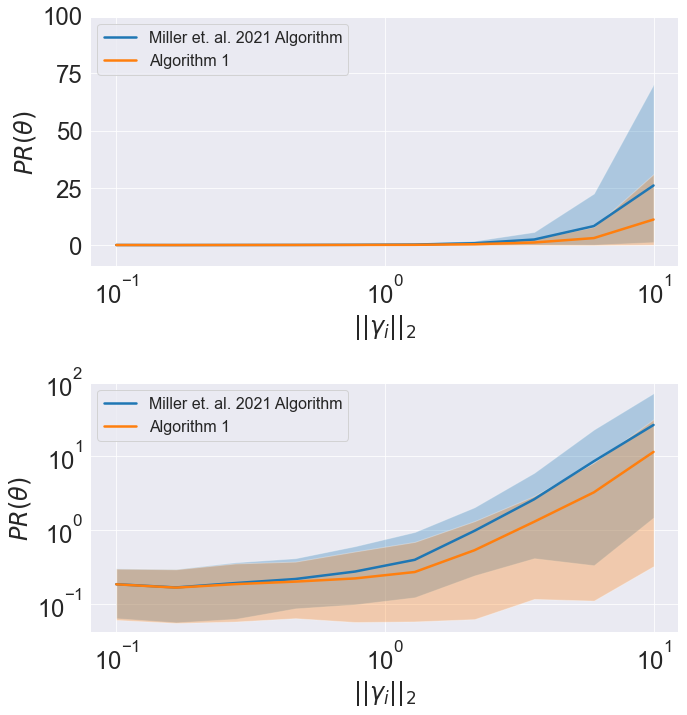

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.semilogx(epsilon_, solo_risk_avg, lw=2.5, label='Miller et. al. 2021 Algorithm')
plt.fill_between(epsilon_, solo_low, solo_high, alpha=0.3)
plt.semilogx(epsilon_, two_stage_risk_avg, lw=2.5, label='Algorithm 1')
plt.fill_between(epsilon_, two_stage_low, two_stage_high, alpha=0.3)
plt.ylim(-10, 100) 
plt.legend(fontsize=16,loc='upper left')
plt.ylabel(r'$PR(\theta)$')
plt.xlabel(r'$||\gamma_i||_2$')
plt.subplot(2,1,2)
plt.loglog(epsilon_, solo_risk_avg, lw=2.5, label='Miller et. al. 2021 Algorithm')
plt.fill_between(epsilon_, solo_low, solo_high, alpha=0.3)
plt.loglog(epsilon_, two_stage_risk_avg, lw=2.5, label='Algorithm 1')
plt.fill_between(epsilon_, two_stage_low, two_stage_high, alpha=0.3)
plt.legend(fontsize=16,loc='upper left')
plt.tight_layout()
plt.ylabel(r'$PR(\theta)$')
plt.xlabel(r'$||\gamma_i||_2$')
plt.show()

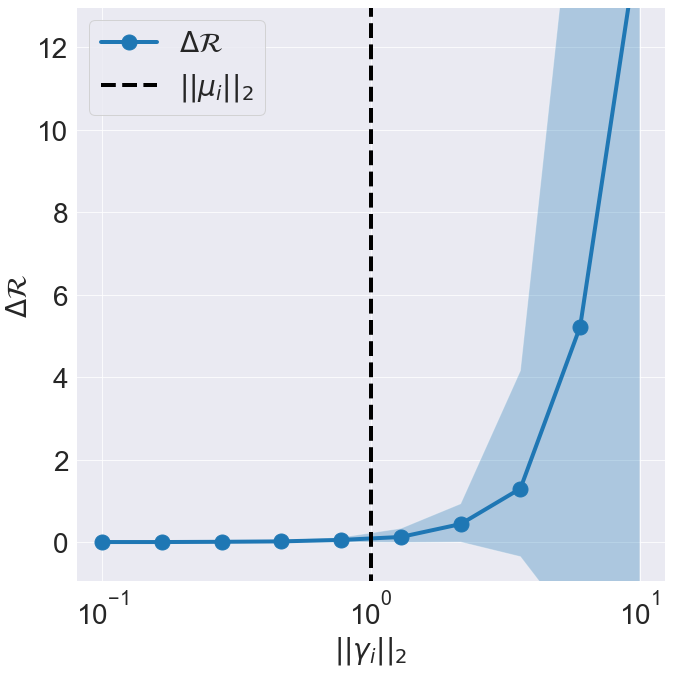

In [11]:
plt.rcParams['font.size'] = 28
plt.rcParams['axes.linewidth'] = 4
plt.figure(figsize=(10,10))
plt.semilogx(epsilon_,diff_avg,lw=4,marker='o',markersize=15,label=r'$\Delta\mathcal{R}$')
plt.fill_between(epsilon_, diff_low, diff_high, alpha=0.3)
plt.plot([epsilon_0,epsilon_0],[-1e2,1e2],'--',
         color='k',label=r'$||\mu_i||_2$',lw=4)
plt.ylim(-1,13)
plt.xlabel(r'$||\gamma_i||_2$')
plt.ylabel(r'$\Delta\mathcal{R}$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('../figures/solo_vs_2stage_risk.pdf', format='pdf')
plt.show()

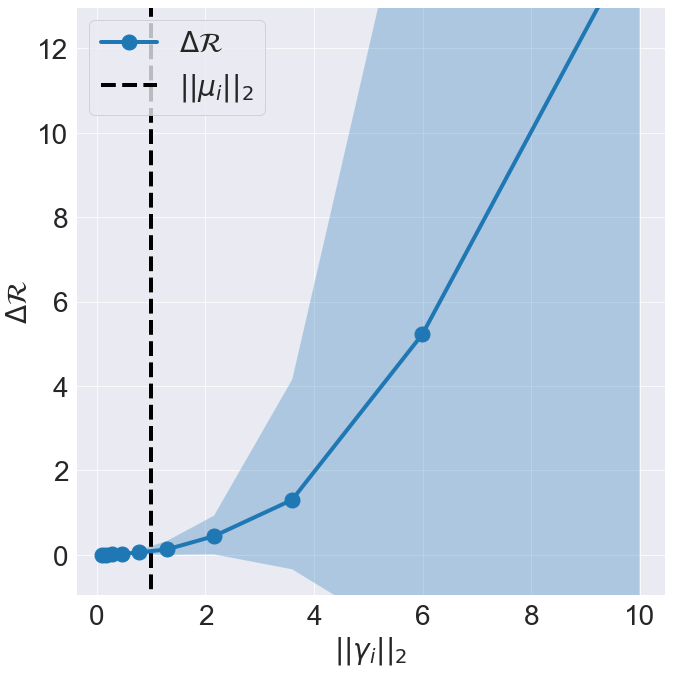

In [12]:
plt.rcParams['font.size'] = 28
plt.rcParams['axes.linewidth'] = 4
plt.figure(figsize=(10,10))
plt.plot(epsilon_,diff_avg,lw=4,marker='o',markersize=15,label=r'$\Delta\mathcal{R}$')
plt.fill_between(epsilon_, diff_low, diff_high, alpha=0.3)
plt.plot([epsilon_0,epsilon_0],[-1e2,1e2],'--',
         color='k',label=r'$||\mu_i||_2$',lw=4)
plt.ylim(-1,13)
plt.xlabel(r'$||\gamma_i||_2$')
plt.ylabel(r'$\Delta\mathcal{R}$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('../figures/solo_vs_2stage_risk_linear.pdf', format='pdf')
plt.show()